In [2]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report

# Decison tree

In [3]:
df = pd.read_csv("data_ml_clean.csv")


----- Arbre de décision : Classification -----
Meilleurs hyperparamètres (Classification): {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.67      0.36      0.47       106
           1       0.47      0.76      0.58        80

    accuracy                           0.53       186
   macro avg       0.57      0.56      0.52       186
weighted avg       0.58      0.53      0.52       186



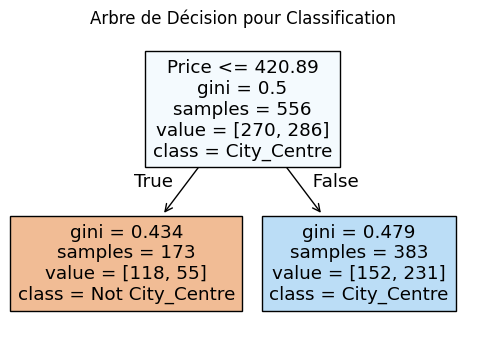


----- Arbre de décision : Régression -----
Meilleurs hyperparamètres (Régression): {'criterion': 'friedman_mse', 'max_depth': 7, 'min_samples_split': 4}
Mean Squared Error (Régression) : 137540.78357050463
Mean Absolute Error (MAE) : 258.298117570057
Mean Absolute Percentage Error (MAPE) : 46.15%


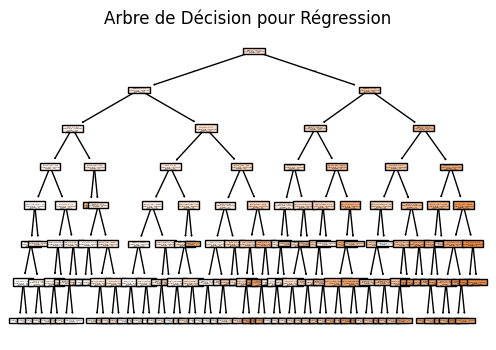

In [4]:
# One-hot encoding pour les "Country" (chaîne de texte transformée en colonnes numériques)
df = pd.get_dummies(df, columns=["Country"], drop_first=True)

# Supposons que **City_Centre** est la variable cible pour CLASSIFICATION
# OU **Price** comme cible pour RÉGRESSION
X_train_class = df.drop(columns=["City_Centre"])  # On retire "Country" et "City_Centre" (ou autre valeur catégorique)
X_train_reg = df.drop(columns=["Price"])
y_classification = df["City_Centre"]            # Pour la classification
y_regression = df["Price"]                      # Pour la régression

# Split des données en train/test
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_train_class, y_classification, test_size=0.25, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_train_reg, y_regression, test_size=0.25, random_state=42)

# Étape 3 : Arbre de Décision pour Classification
print("\n----- Arbre de décision : Classification -----")
dt_classifier = DecisionTreeClassifier(random_state=42)

# GridSearchCV pour optimiser les hyperparamètres
param_grid_class = {
    "max_depth": range(1, 11),  # Tester différentes profondeurs
    "min_samples_split": range(2, 11),  # Tester différents seuils de division
    "criterion": ["gini", "entropy"]
}

grid_search_class = GridSearchCV(dt_classifier, param_grid_class, cv=5, scoring="accuracy")
grid_search_class.fit(X_train_class, y_train_class)

# Meilleurs hyperparamètres et évaluation
best_params_class = grid_search_class.best_params_
print(f"Meilleurs hyperparamètres (Classification): {best_params_class}")

dt_classifier = DecisionTreeClassifier(**best_params_class, random_state=42)
dt_classifier.fit(X_train_class, y_train_class)
y_pred_class = dt_classifier.predict(X_test_class)

print(classification_report(y_test_class, y_pred_class))

# Visualiser l'arbre
plt.figure(figsize=(6, 4))
plot_tree(dt_classifier, feature_names=X_train_class.columns, class_names=["Not City_Centre", "City_Centre"], filled=True)
plt.title("Arbre de Décision pour Classification")
plt.show()

# Étape 4 : Arbre de Décision pour Régression
print("\n----- Arbre de décision : Régression -----")
dt_regressor = DecisionTreeRegressor(random_state=42)

# GridSearchCV pour optimiser les hyperparamètres
param_grid_reg = {
    "max_depth": range(1, 11),  # Tester différentes profondeurs
    "min_samples_split": range(2, 11),  # Tester différents seuils de division
    "criterion": ["squared_error", "friedman_mse"]
}

grid_search_reg = GridSearchCV(dt_regressor, param_grid_reg, cv=5, scoring="neg_mean_squared_error")
grid_search_reg.fit(X_train_reg, y_train_reg)

# Meilleurs hyperparamètres et évaluation
best_params_reg = grid_search_reg.best_params_
print(f"Meilleurs hyperparamètres (Régression): {best_params_reg}")

dt_regressor = DecisionTreeRegressor(**best_params_reg, random_state=42)
dt_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = dt_regressor.predict(X_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mape = (abs(y_test_reg - y_pred_reg) / abs(y_test_reg)).mean() * 100
print(f"Mean Squared Error (Régression) : {mse}")
print(f"Mean Absolute Error (MAE) : {mae}")
print(f"Mean Absolute Percentage Error (MAPE) : {mape:.2f}%")

# Visualiser l'arbre
plt.figure(figsize=(6, 4))
plot_tree(dt_regressor, feature_names=X_train_reg.columns, filled=True)
plt.title("Arbre de Décision pour Régression")
plt.show()